# Series and Parallel Resistor Combinations

What happens to uncertainty in resistor value by combining resistors in series/parallel combinations?
Keep the total resistance the same, but vary the number of individual components.

Each loop builds not only the nominal values, but also the function used in `suncal.Model`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import suncal

In [2]:
Rnom = 1000
tol = .05

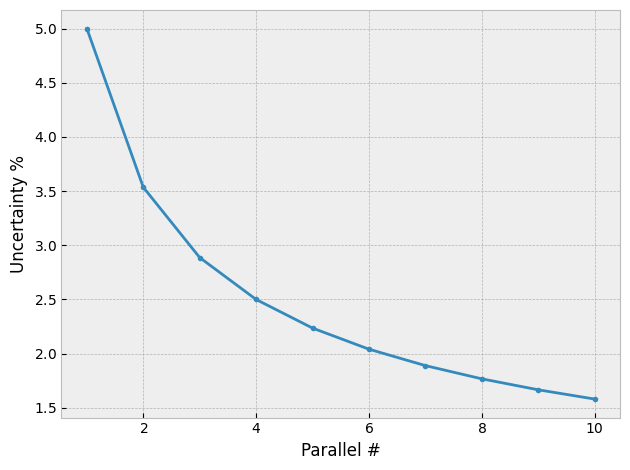

In [3]:
# Parallel combinations
N = 10

p_uncert = np.zeros(N)
nrange = range(1,N+1)
for n in nrange:
    Rn = Rnom*n
    f = '1/(' + '+'.join(['1/R{}'.format(i) for i in range(n)]) + ')'  # Build the function 1/(1/R1 + 1/R2 ... + 1/Rn)
    u = suncal.Model(f)
    for i in range(n):
        u.var(f'R{i}').measure(Rn).typeb(std=Rn*tol)
    result = u.calculate_gum()
    p_uncert[n-1] = result.uncertainty['f1'] / result.expected['f1'] * 100

plt.plot(nrange, p_uncert, marker='.')
plt.xlabel('Parallel #')
plt.ylabel('Uncertainty %')
plt.tight_layout()

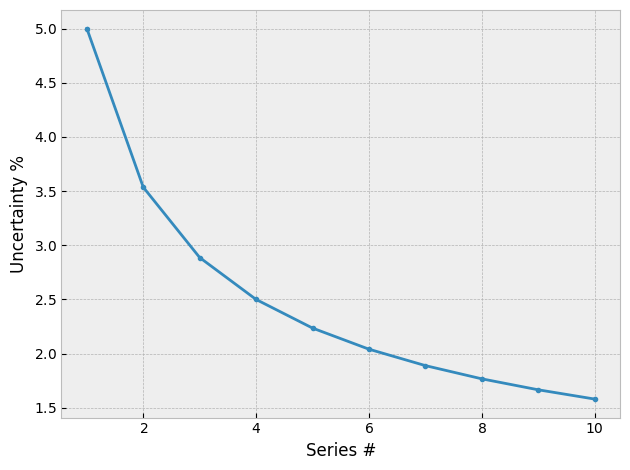

In [4]:
# Series combinations
M = 10

p_uncert = np.zeros(M)
mrange = range(1,M+1)
for m in mrange:
    Rm = Rnom/m
    f = '+'.join(['R{}'.format(i) for i in range(m)])  # Build the function (R1 + R2 ... + Rm)
    u = suncal.Model(f)
    for i in range(m):
        u.var(f'R{i}').measure(Rm).typeb(std=Rm*tol)
    result = u.calculate_gum()
    p_uncert[m-1] = result.uncertainty['f1'] / result.expected['f1'] * 100

plt.plot(mrange, p_uncert, marker='.')
plt.xlabel('Series #')
plt.ylabel('Uncertainty %')
plt.tight_layout()

In [5]:
# Parallel-Series combinations
N = 5  # n parallel resistors
M = 5  # m series groups

p_uncert2 = np.zeros((N,M))
nrange = range(1, N+1)
mrange = range(1, M+1)
for m in mrange:
    for n in nrange:
        Rg = Rnom / m # Each group
        Rm = Rg * n   # Each R in group
        f =  '+'.join([ '1/(' + '+'.join(['1/R{}'.format(i+j*n)  # Build the function (1/(1/R1 + 1/R2 + .. 1/Rn) + 1/(1/R3 + 1/R4 .. + 1/Rn)).. etc
                            for i in range(n)]) +')' for j in range(m) ])
        u = suncal.Model(f)
        for i in range(n*m):
            u.var(f'R{i}').measure(Rm).typeb(std=Rm*tol)
        result = u.calculate_gum()
        p_uncert2[n-1,m-1] = result.uncertainty['f1'] / result.expected['f1'] * 100


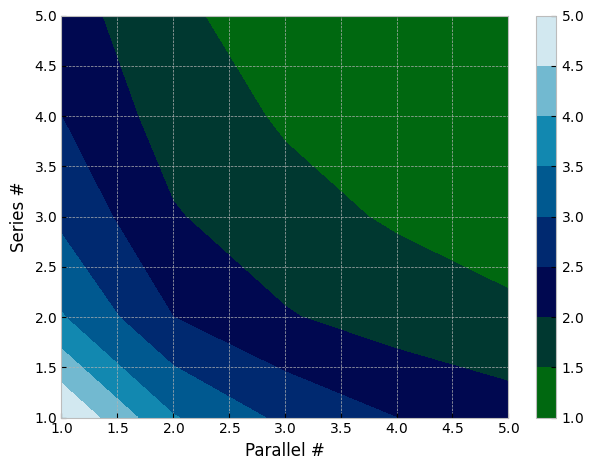

In [6]:
X, Y = np.meshgrid(nrange,mrange)
plt.contourf(X, Y, p_uncert2, cmap='ocean')
plt.colorbar()
plt.xlabel('Parallel #')
plt.ylabel('Series #')
plt.tight_layout()

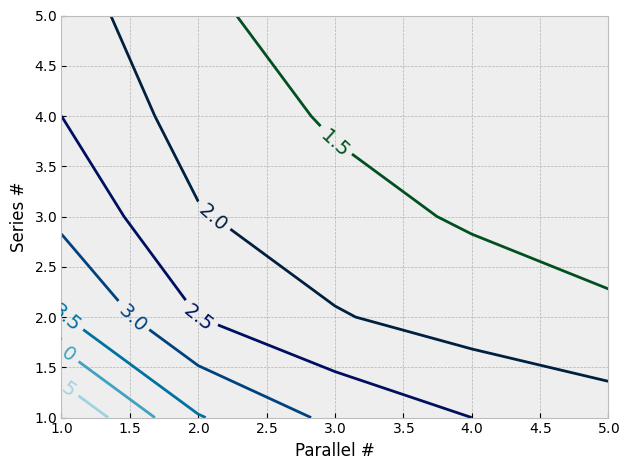

In [7]:
p = plt.contour(X,Y,p_uncert2, cmap='ocean')
plt.clabel(p, inline=1, fontsize=14)
plt.xlabel('Parallel #')
plt.ylabel('Series #')
plt.tight_layout()

(10.0, 0.0)

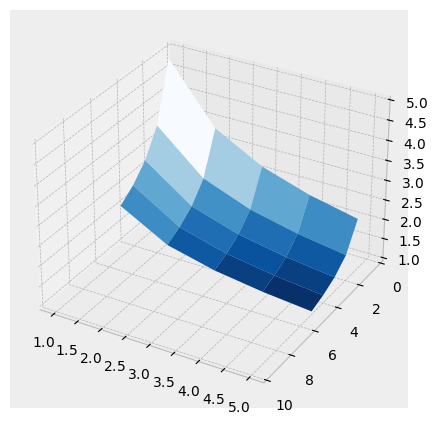

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, p_uncert2, rstride=1, cstride=1, cmap='Blues_r')
ax.set_ylim(10,0)